In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
#from scipy.sparse.linalg import eigsh, expm_multiply, expm

In [38]:
import importlib

import sys
sys.path.append('/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/Chebyshev')
sys.path.append('/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI')
sys.path.append("/home/t30/all/go56vod/Desktop/Student-Research-Job/Chebyshev")
sys.path.append("/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI")


import ED_Cs_Lsites as ED
import Chebyshev as Cbs
import TCI_Lsite as TCI
import FourierTransform as FT

importlib.reload(ED)
importlib.reload(Cbs)
importlib.reload(TCI)
importlib.reload(FT)

<module 'FourierTransform' from '/home/t30/pol/go56vod/Desktop/Student-Research-Job/Correlation_function/FourierTransform.py'>

### Correlator generalized for L sites

In [39]:
# define Hamiltonian terms
L = 11
n = 10
dt = 1e-2
models = ['J = 1, g = 2 , Ising Model Ham. = H','J =1 g = 2 Ham. = H - k*Hzz', 'J = 1 g = 0.5, Ham. = H - h * Hxx', 'J = 1 g = 0.5, Ham. = H - k*Hzz - h*Hxx']
threshold = 30
N = 2**n
D = L

### TCI interpolation of 4 models

0
err_max:  7.626863578769382e-05
err_2:  5.173690886875848e-05
eval/D:  652

repeated evaluations:  1208
unique evaluations 652
unique + repeated:  1860
total evaluations:  1860



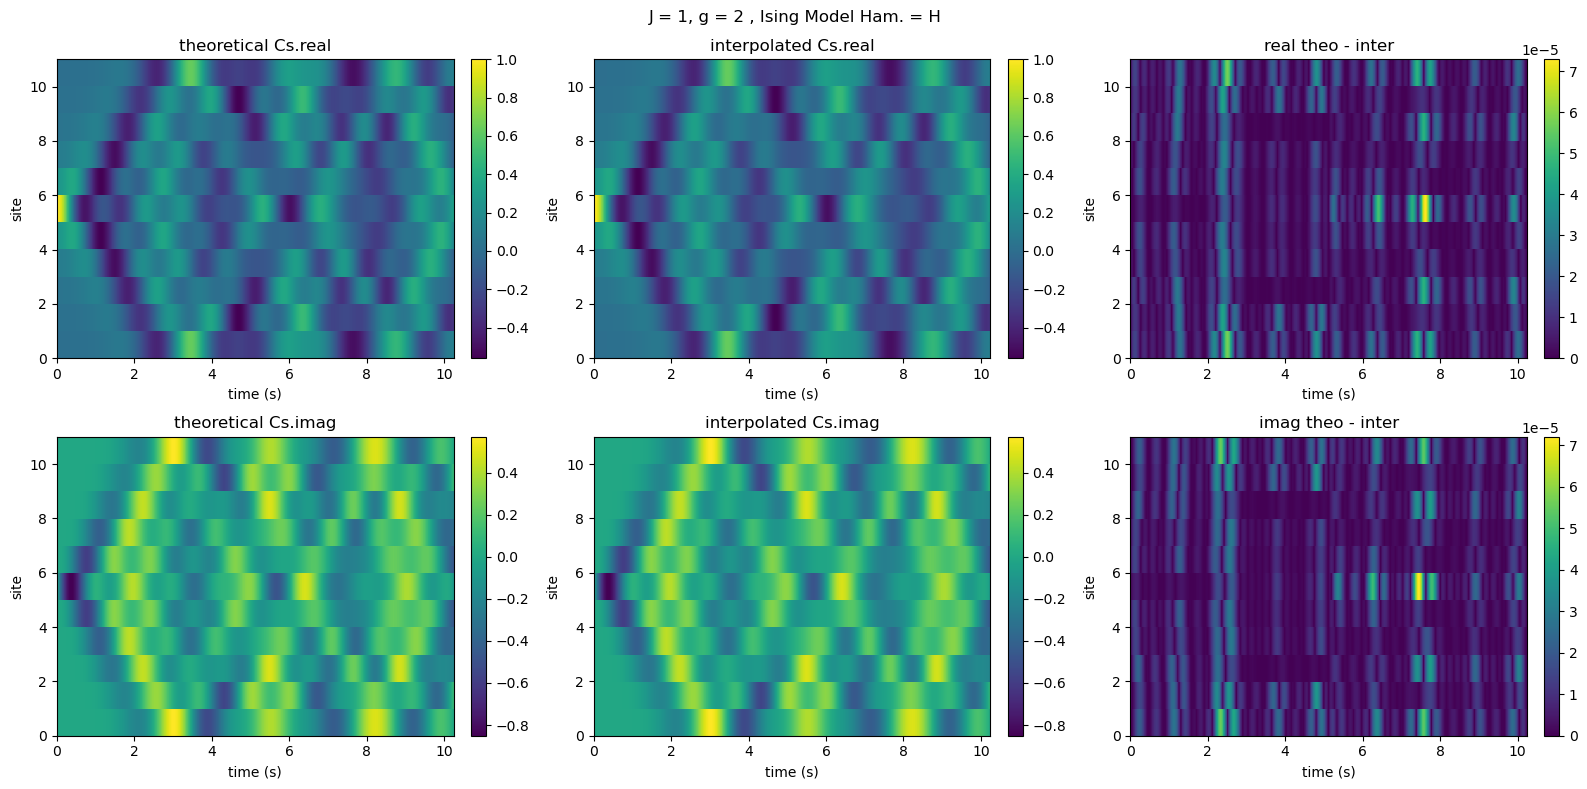

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Compute Fourier transform
finished
Compute Fourier transform
finished


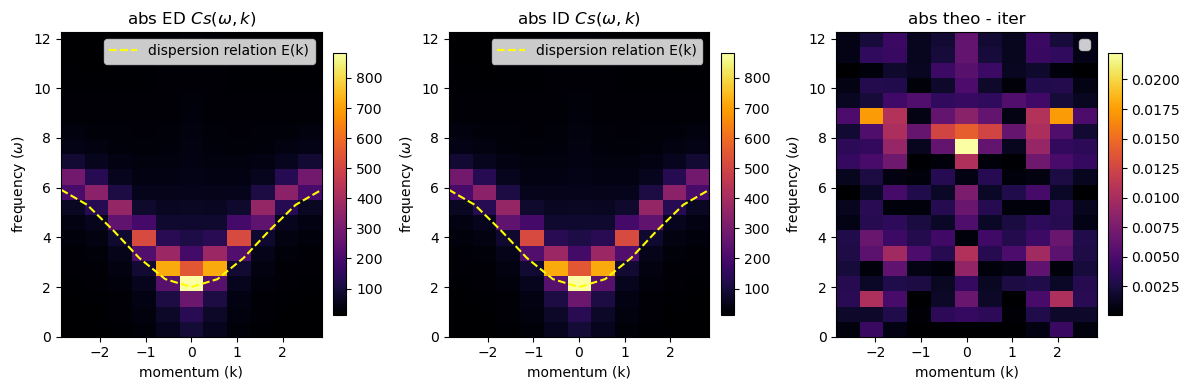

1
err_max:  3.494255407147182e-05
err_2:  3.008245900583336e-05
eval/D:  672

repeated evaluations:  1188
unique evaluations 672
unique + repeated:  1860
total evaluations:  1860



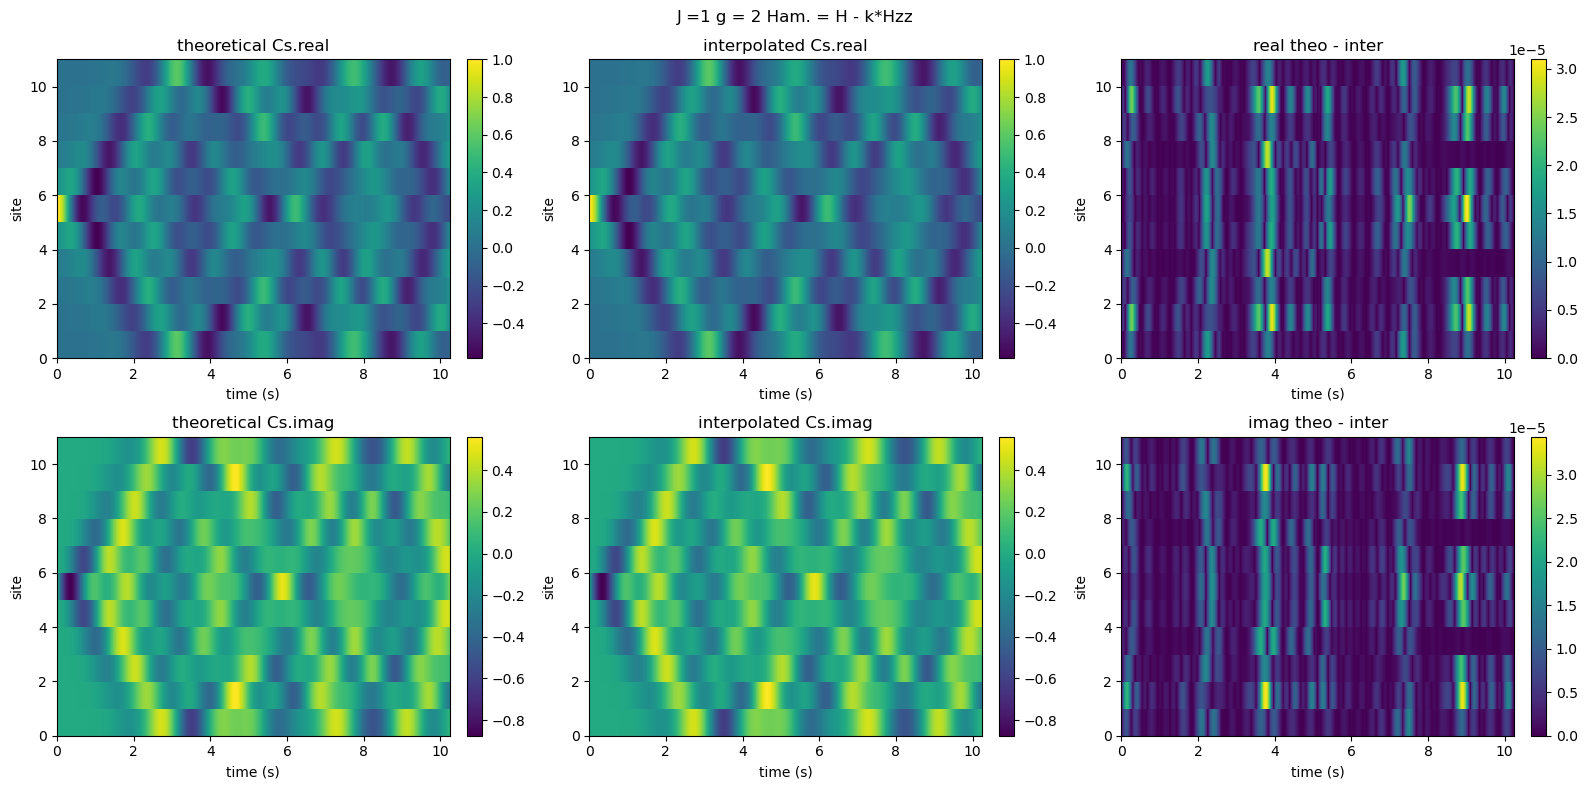

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Compute Fourier transform
finished
Compute Fourier transform
finished


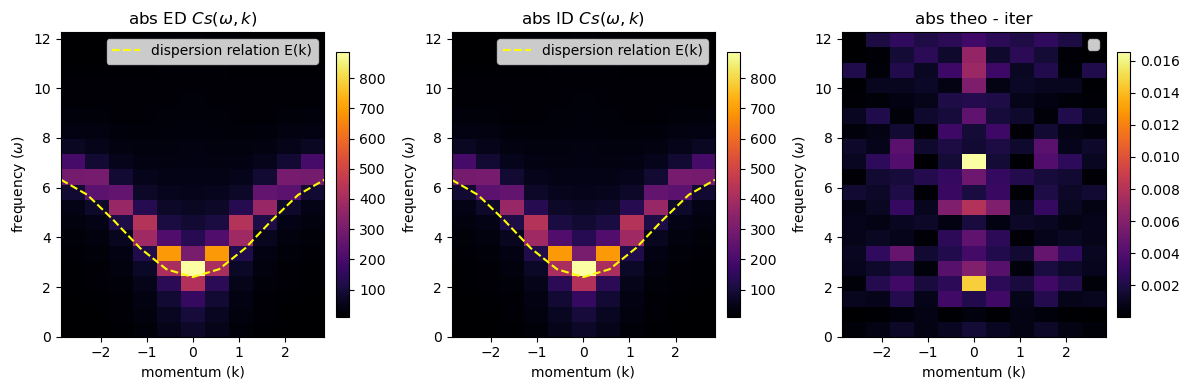

2
err_max:  7.523654111062648e-06
err_2:  8.066105333896548e-06
eval/D:  652

repeated evaluations:  1208
unique evaluations 652
unique + repeated:  1860
total evaluations:  1860



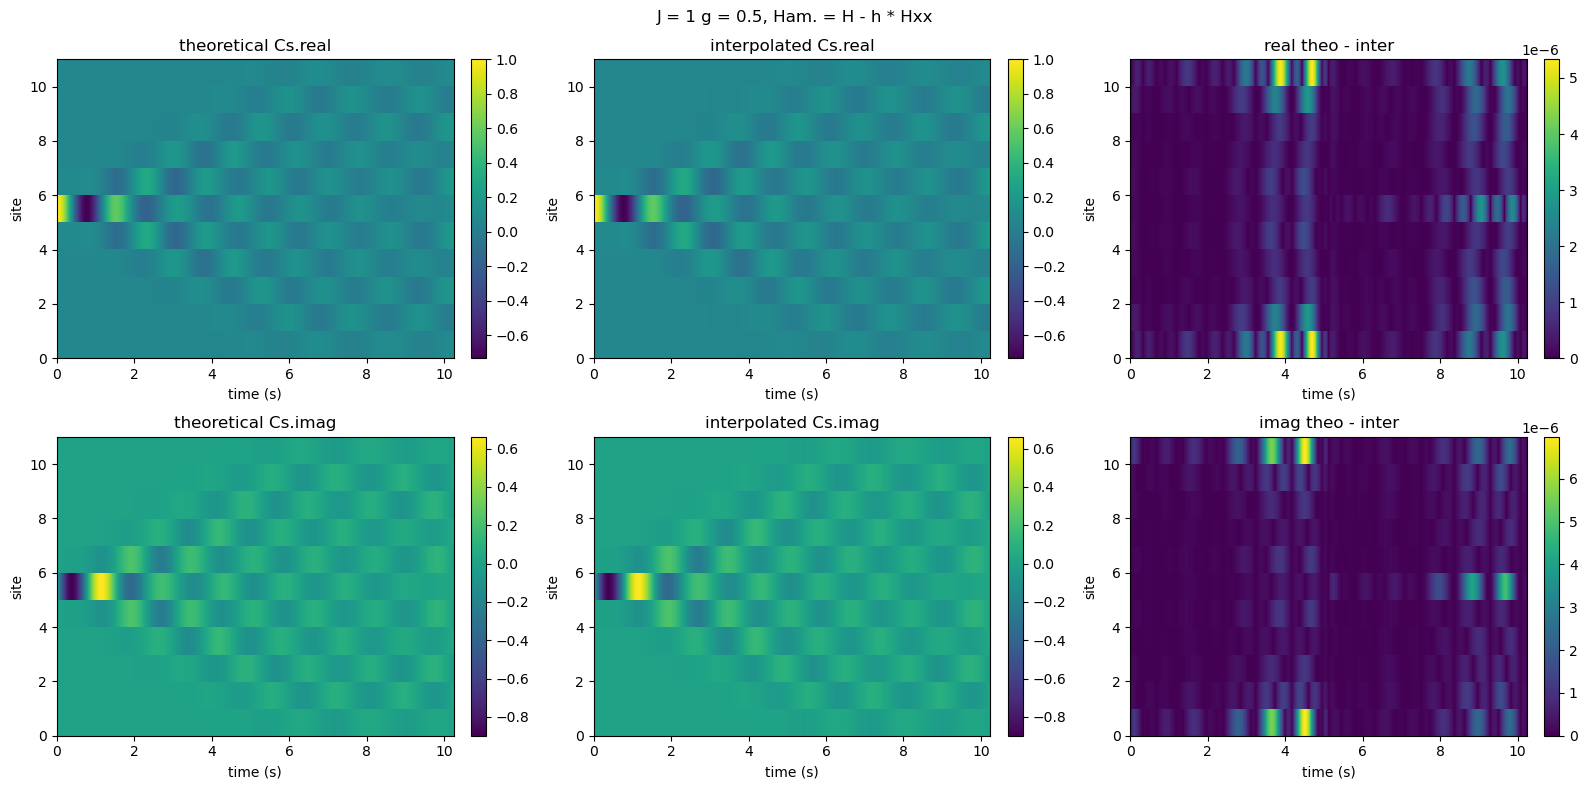

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Compute Fourier transform
finished
Compute Fourier transform
finished


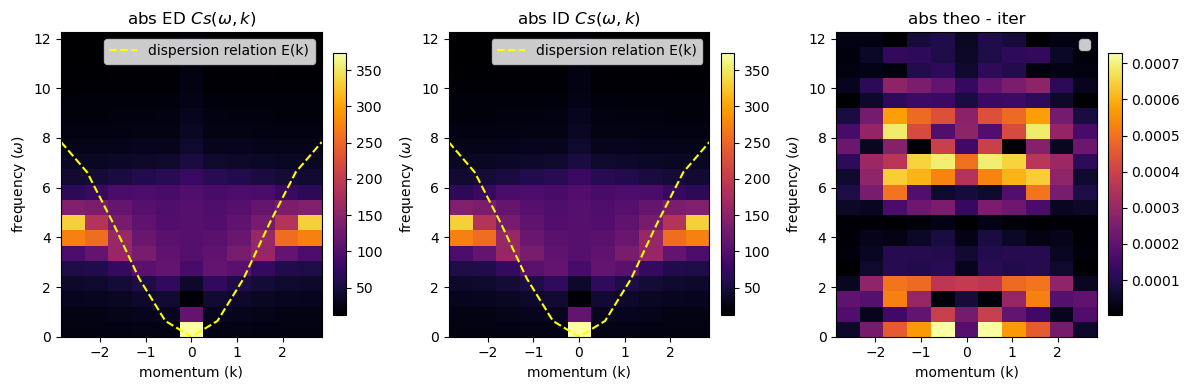

3
err_max:  1.666962692038521e-05
err_2:  1.834521149604792e-05
eval/D:  652

repeated evaluations:  1208
unique evaluations 652
unique + repeated:  1860
total evaluations:  1860



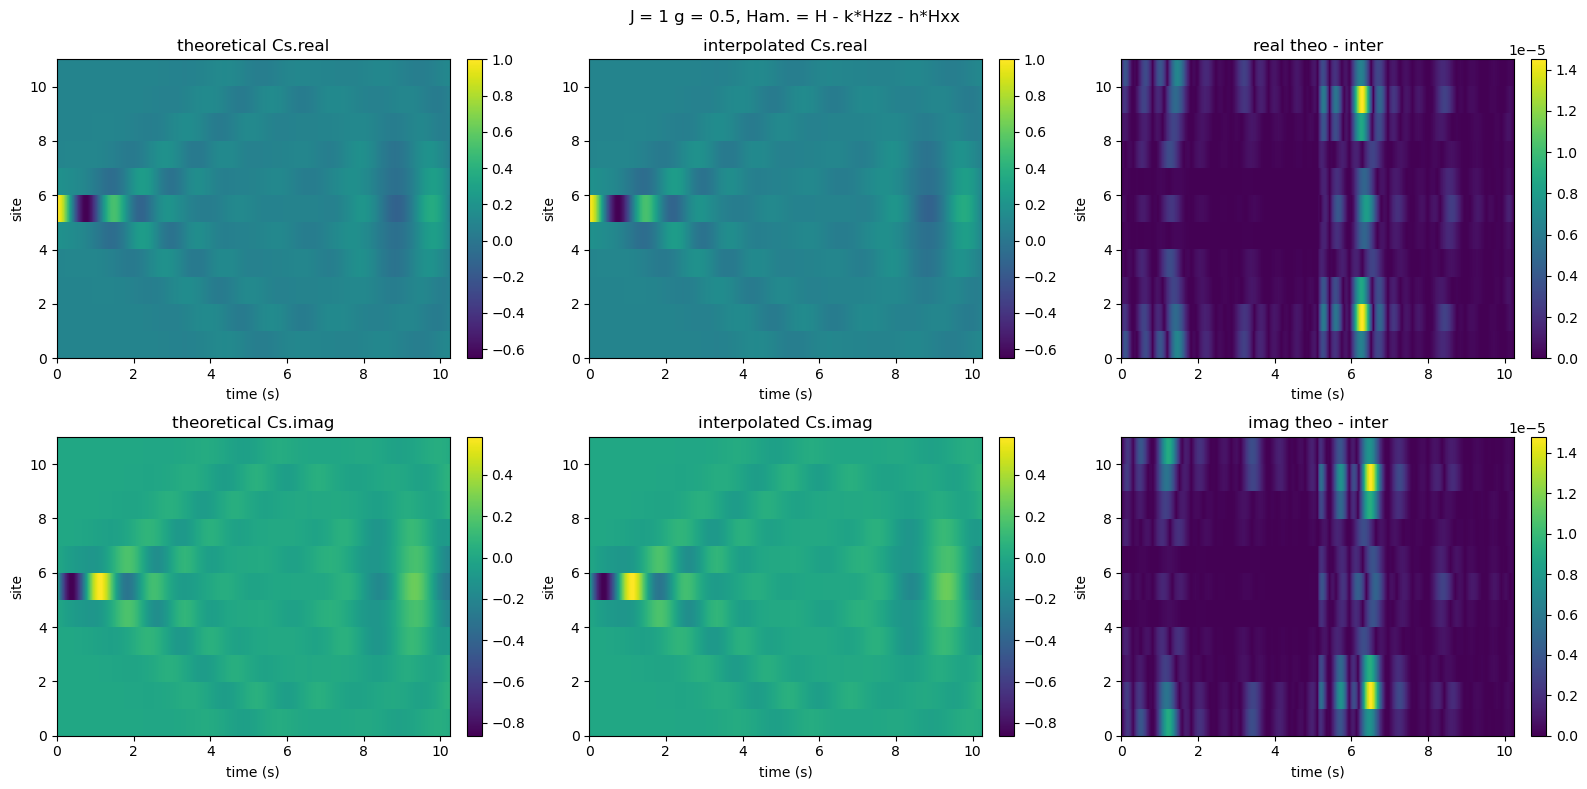

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Compute Fourier transform
finished
Compute Fourier transform
finished


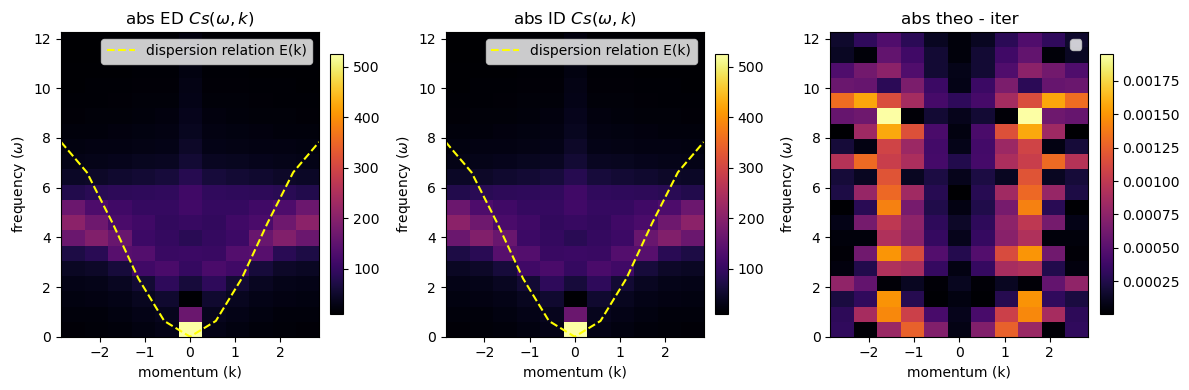

In [40]:
C = {}
for idx, model in enumerate(models):
    print(idx)
    H = ED.gen_Ham(L = L, model = idx)
    if idx < 2: 
        Cs = ED.correlator(H= H, L = L, dt = dt,  n = n)
    else:
        Cs = ED.correlator(H= H, L = L, dt = dt,  n = n, Sx = False)
        
    C[f"Cs_{idx}"] = Cs

    func_vals = Cs.T #Cs is in the form (X,T)
    f_t = lambda *t: Cs.reshape((D,) + (2,) * n)[:,*t]
    func = TCI.function(f_t)

    As, _, eval, err_2, err_max, func_interp = TCI.tensor_cross_interpolation(func,         # function to be interpolated
                                    func_vals,    
                                    D,
                                    L=n,          # number of MPS tensors
                                    eps_or_chi=10, # bond dimension
                                    iters=1)       # number of back-and-forth sweeps
    rows, cols = 2, 3  # Define grid dimensions
    a, b = Cs.shape
    interp_Cs = func_interp.T.reshape(a, b)

    # Data and titles for each subplot
    data = [
        (Cs.real, 'theoretical Cs.real'),
        (np.real(interp_Cs), 'interpolated Cs.real'),
        (np.abs(Cs.real - np.real(interp_Cs)), 'real theo - inter'),
        (Cs.imag, 'theoretical Cs.imag'),
        (np.imag(interp_Cs), 'interpolated Cs.imag'),
        (np.abs(Cs.imag - np.imag(interp_Cs)), 'imag theo - inter')
    ]

    # Create subplots
    fig, axs = plt.subplots(rows, cols, figsize=(16, 8))

    # Loop through data and subplots
    for ax, (image, title) in zip(axs.flat, data):
        im = ax.imshow(image, aspect='auto', interpolation='none', origin = 'lower',  extent = [0, N*dt, 0, L])
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)  # Add colorbar
        ax.set_title(title)
        ax.set(xlabel = 'time (s)', ylabel = 'site')

    fig.suptitle(model)

    plt.tight_layout()
    plt.show()

    #here on we are doing Fourier Transform

    Swk, momenta, freqs = FT.get_Swk(Cs.T, L, dt = dt)
    interp_Swk, interp_momenta, interp_freqs = FT.get_Swk(func_interp, L, dt = dt)

    FT.fig_Swk(Swk, momenta, freqs, interp_Swk, interp_momenta, interp_freqs, idx, interval = 20)


### Interpolation with Chebyshev

In [41]:
L = 11
dt = 1e-2
n = 11
chi = 50
N = 2**n
D = L
models = ['J = 1, g = 2 , Ising Model Ham. = H','J =1 g = 2 Ham. = H - k*Hzz', 'J = 1 g = 0.5, Ham. = H - h * Hxx', 'J = 1 g = 0.5, Ham. = H - k*Hzz - h*Hxx']
threshold = 30


chi:  50
0
err_2:  0.00037661134642280754
err_max:  0.0005699284955057449
evaluations:  1100


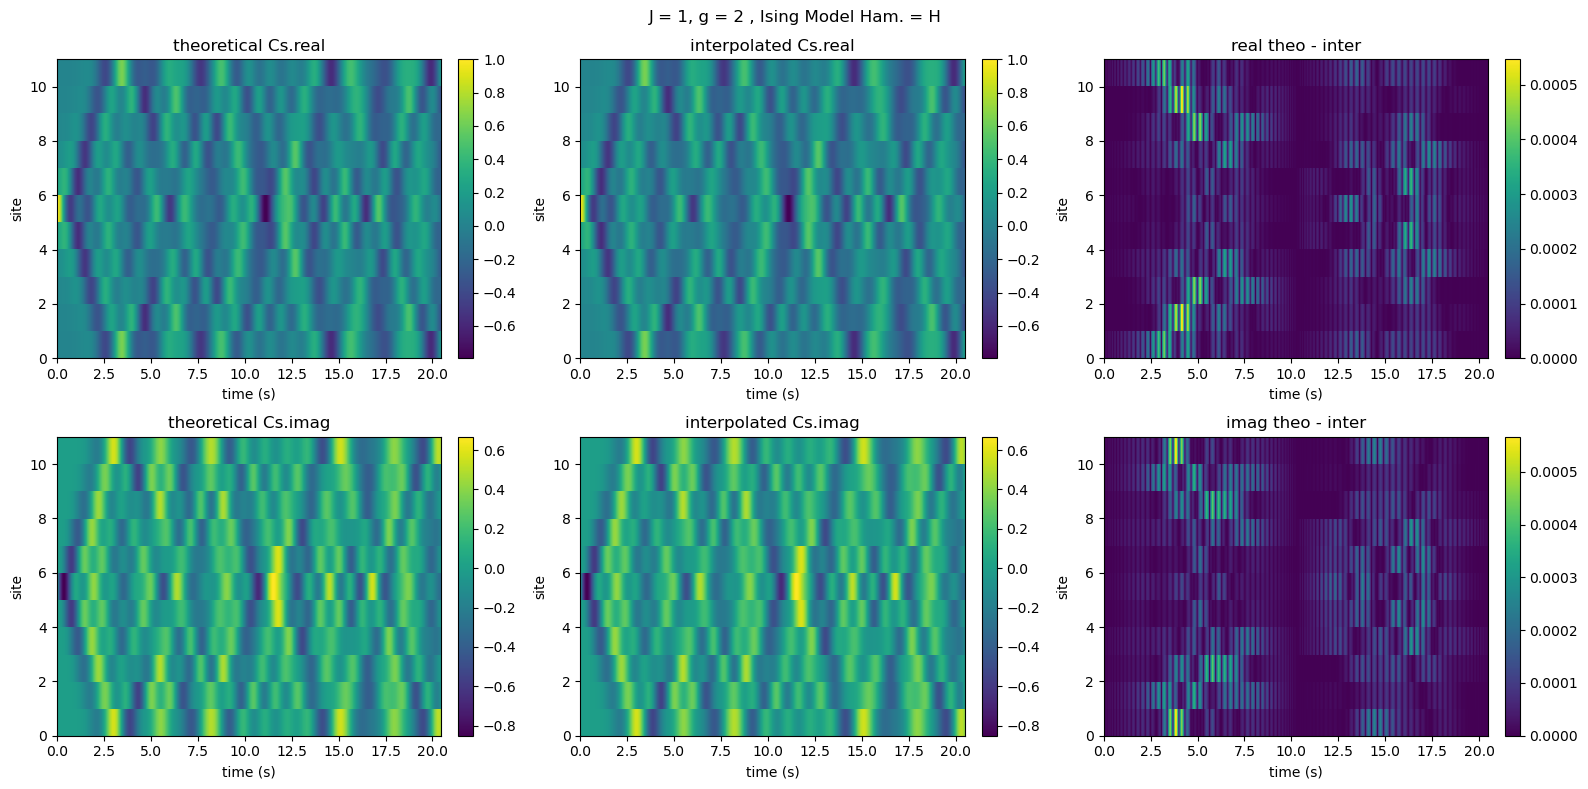

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Compute Fourier transform
finished
Compute Fourier transform
finished


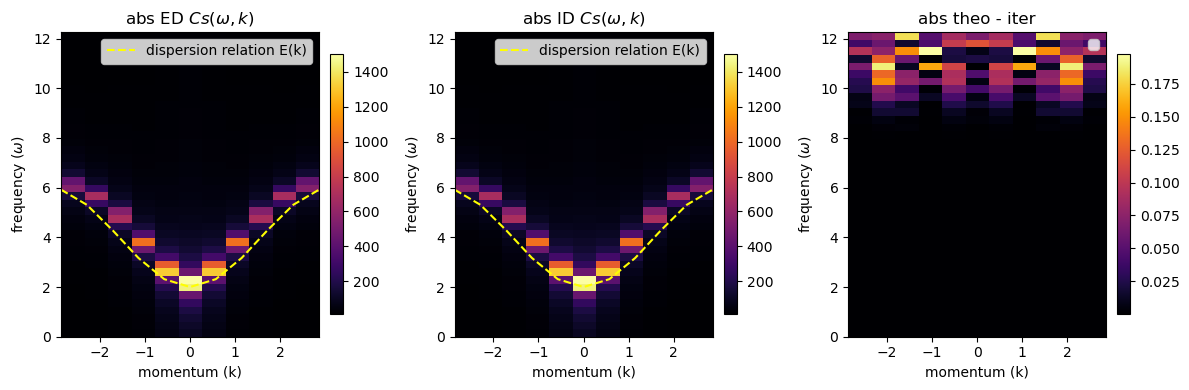

1
err_2:  0.00045612639231282963
err_max:  0.0006829005239215399
evaluations:  1100


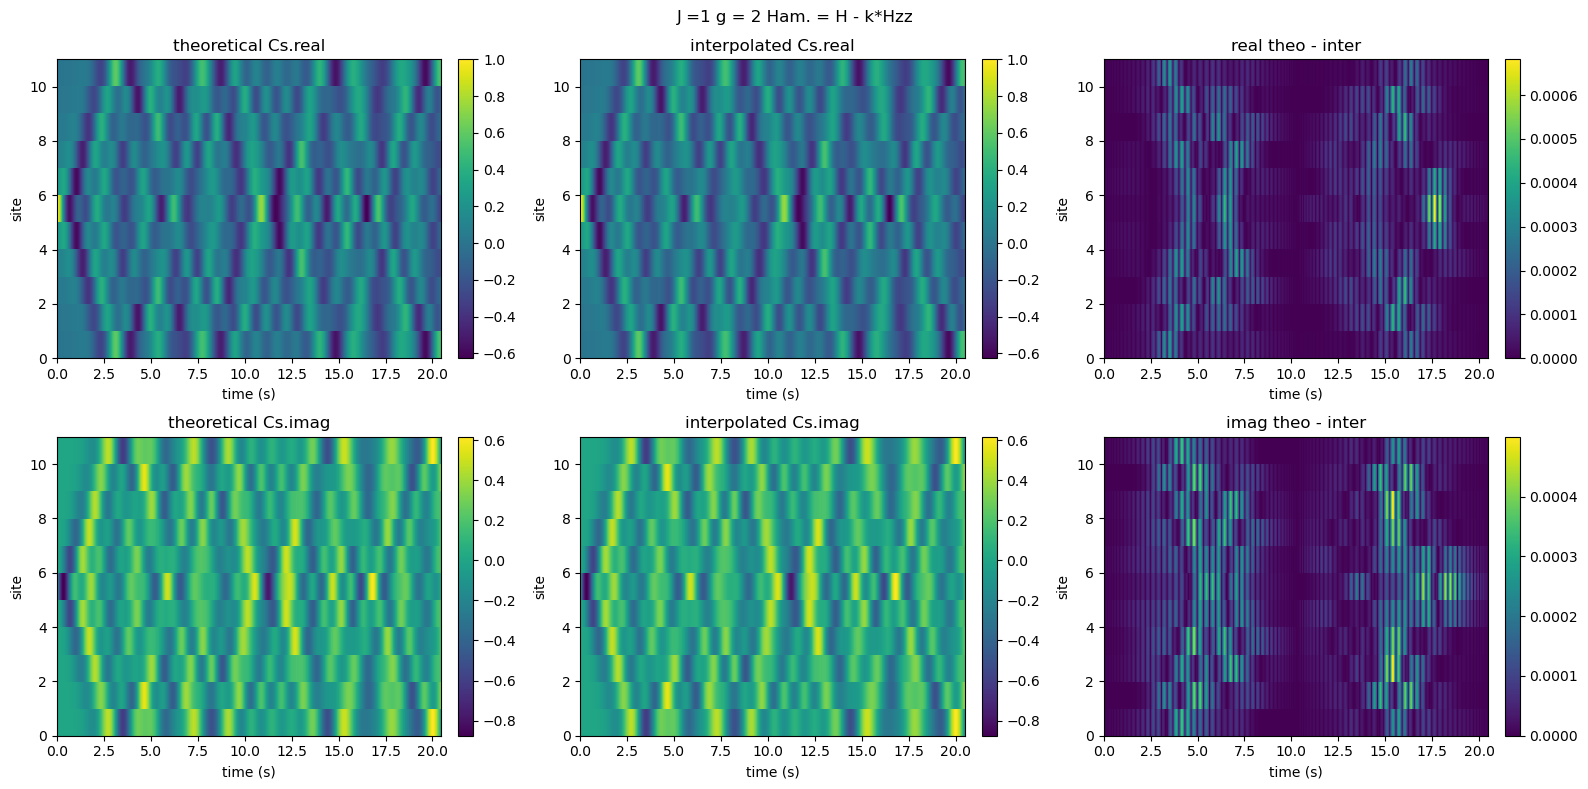

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Compute Fourier transform
finished
Compute Fourier transform
finished


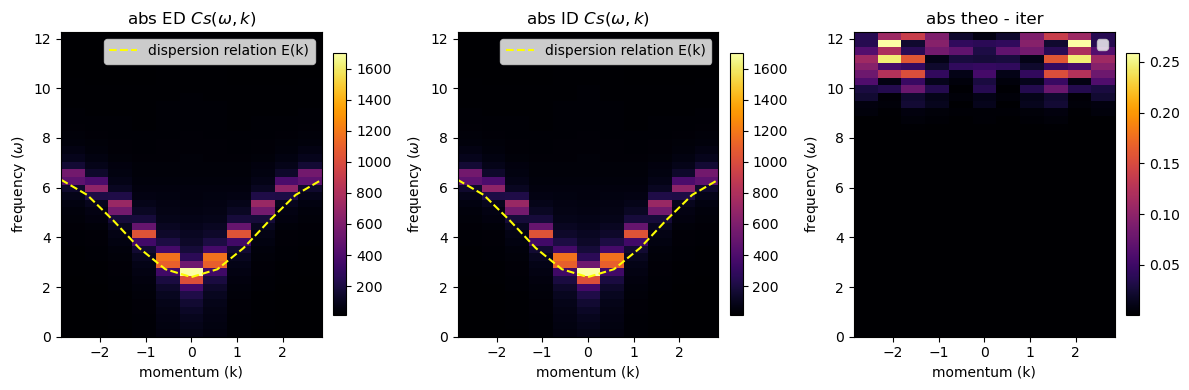

2
err_2:  9.813595573980059e-10
err_max:  5.724045010255345e-10
evaluations:  1100


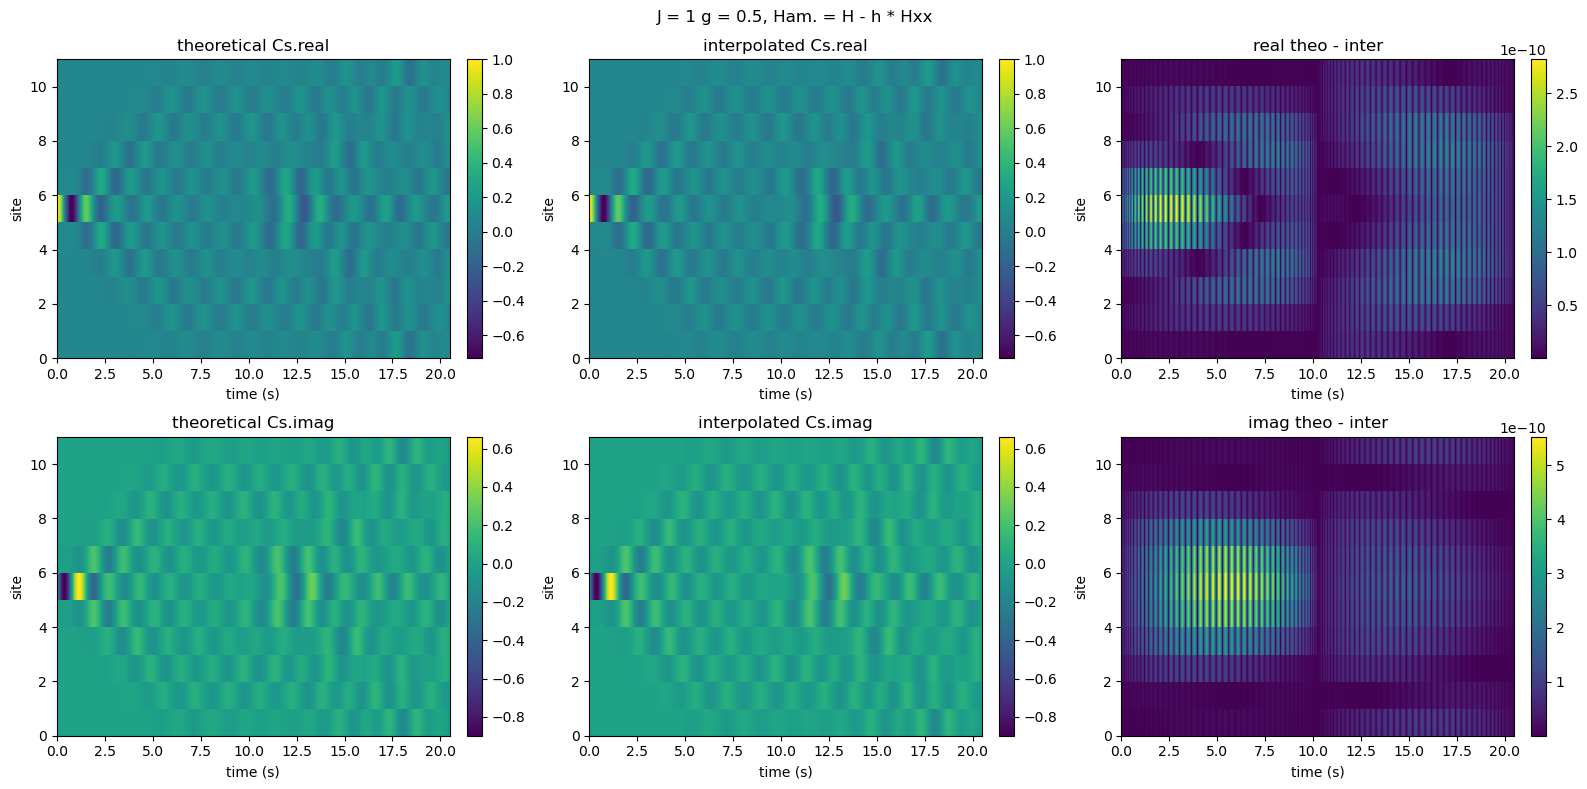

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Compute Fourier transform
finished
Compute Fourier transform
finished


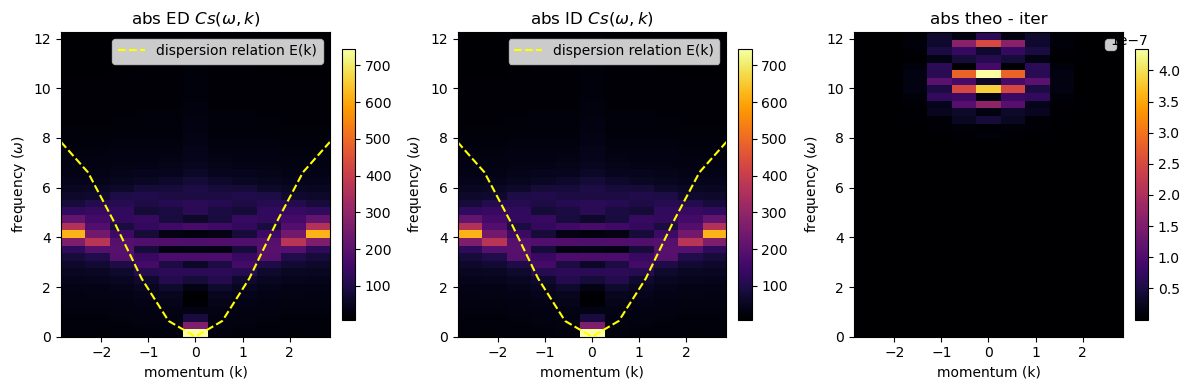

3
err_2:  5.217036740639121e-06
err_max:  3.033752108253396e-06
evaluations:  1100


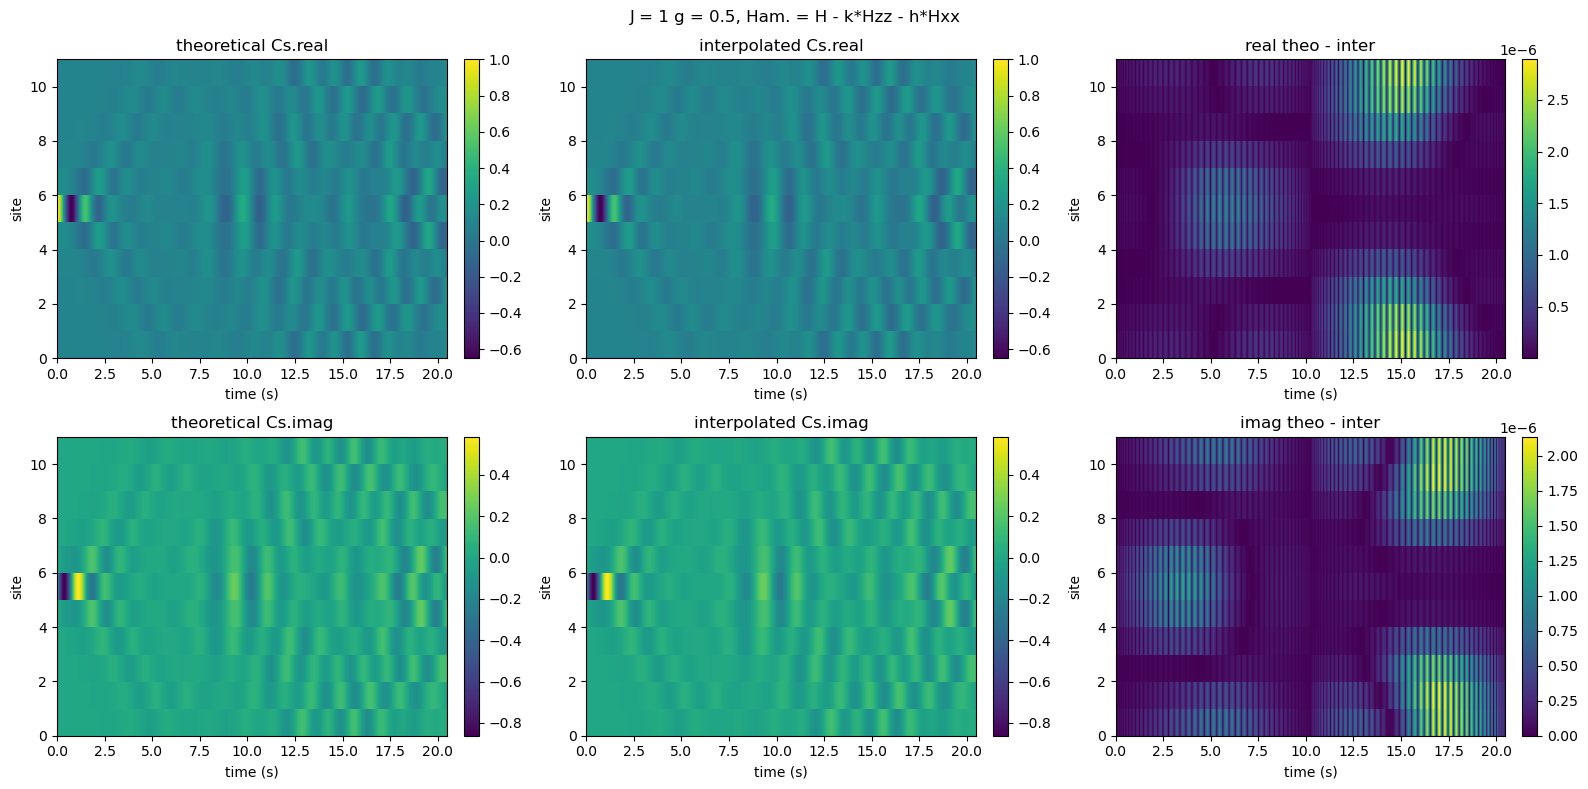

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Compute Fourier transform
finished
Compute Fourier transform
finished


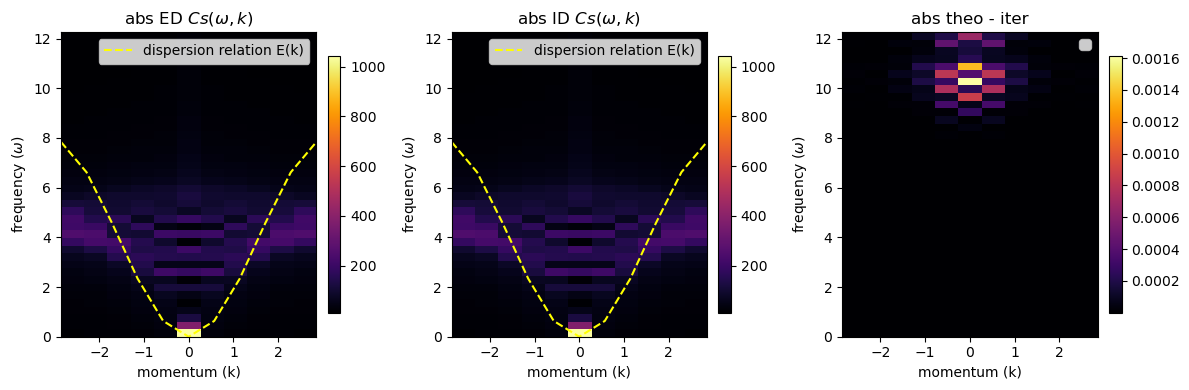

In [42]:

print("chi: ", chi)

#func = lambda: ED.correlator_Chebyshev(H=H, dt=dt, n=n, D_list=D_list, t_matrix=t_matrix)
def func_1(D_list, t_matrix):
    return ED.correlator_Chebyshev(H=H, dt=dt, n=n, D_list=D_list, t_matrix=t_matrix)

def func_2(D_list, t_matrix):
    return ED.correlator_Chebyshev(H=H, dt=dt, n=n, D_list=D_list, t_matrix=t_matrix, Sx = False)

for idx, model in enumerate(models):
    print(idx)
    H = ED.gen_Ham(model = idx)
    #Cs = C[f"Cs_{idx}"]
    if idx < 2:
        Cs = ED.correlator(H= H, L = L, dt = dt,  n = n)
        func = func_1
    else:
        Cs = ED.correlator(H= H, L = L, dt = dt,  n = n, Sx = False)
        func = func_2      
    func_vals = Cs.T #Cs is in the form (X,T)
    # get MPS from Chebyshev interpolation
    As, evals, err_max, err_2, func_interp = Cbs.Chebyshev_interpolation_Dsite(func, # function to be interpolated
                                    func_vals,
                                    L=n,              # number of MPS tensors
                                    D = D,
                                    chi=chi)           # (half of the) bond dimension

    print("err_2: ", err_2)
    print("err_max: ", err_max)
    print("evaluations: ", evals)

    rows, cols = 2, 3  # Define grid dimensions
    a, b = Cs.shape
    interp_Cs = func_interp.T.reshape(a, b)

    # Data and titles for each subplot
    data = [
        (Cs.real, 'theoretical Cs.real'),
        (np.real(interp_Cs), 'interpolated Cs.real'),
        (np.abs(Cs.real - np.real(interp_Cs)), 'real theo - inter'),
        (Cs.imag, 'theoretical Cs.imag'),
        (np.imag(interp_Cs), 'interpolated Cs.imag'),
        (np.abs(Cs.imag - np.imag(interp_Cs)), 'imag theo - inter')
    ]

    # Create subplots
    fig, axs = plt.subplots(rows, cols, figsize=(16, 8))

    # Loop through data and subplots
    for ax, (image, title) in zip(axs.flat, data):
        im = ax.imshow(image, aspect='auto', interpolation='none', origin = 'lower',  extent = [0, N*dt, 0, L])
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)  # Add colorbar
        ax.set_title(title)
        ax.set(xlabel = 'time (s)', ylabel = 'site')

    fig.suptitle(model)

    plt.tight_layout()
    plt.show()


    #here on we are doing Fourier Transform

    Swk, momenta, freqs = FT.get_Swk(Cs.T, L, dt = dt)
    interp_Swk, interp_momenta, interp_freqs = FT.get_Swk(func_interp, L, dt = dt)


    FT.fig_Swk(Swk, momenta, freqs, interp_Swk, interp_momenta, interp_freqs, idx, interval = 40)
    











# exact function values
#xs = np.linspace(0, N*dt, 2**n, endpoint=False)
#ts = np.arange(N)*dt